**Sistemas de Recomendación - Tu Futuro según la Data**

Este proyecto propone construir un modelo de clasificación supervisada que, a partir de datos demográficos y socioeconómicos de una persona adulta (edad, nivel educativo, ocupación, estado civil, país de origen, etc.), prediga si dicha persona ganará más o menos de 50,000 USD al año.

En base a los resultados del modelo, los estudiantes deberán desarrollar un sistema de recomendación interpretativo, capaz de sugerir posibles estrategias o cambios para aumentar la probabilidad de superar ese umbral de ingresos.

**Objetivos**
1. Explorar los datos del censo.
2. Construir perfiles socioeconómicos.
3. Explorar la importancia y peso de variables sociales (educación, género, raza, etc.) en predicciones económicas.
4. Aplicar técnicas de sistemas de recomendación.
5. Visualizar y comunicar hallazgos de forma profesional.

**🌱 Cómo iniciar este proyecto**

Sigue las siguientes instrucciones:

- Crea un nuevo repositorio basado en el proyecto de Machine Learning haciendo clic aquí.
- Abre el repositorio creado recientemente en Codespace usando la extensión del botón de Codespace.
- Una vez que el VSCode del Codespace haya terminado de abrirse, comienza tu proyecto siguiendo las instrucciones a continuación.

**📝 Instrucciones**

1. Carga del conjunto de datos. Usaremos el dataset Adult Income Dataset, también conocido como "Census Income" este información fue recolectada por la Oficina del Censo de EE.UU. y descargada por la academia para guardarla en esta carpeta de proyecto bajo el nombre adult-census-income.csv o puedes cargarlo en el código directamente desde el siguente enlace:

https://breathecode.herokuapp.com/asset/internal-link?id=2326&path=adult-census-income.csv

Este dataset incluye variables como:

- Edad
- Nivel educativo
- Estado civil
- Ocupación
- Horas trabajadas por semana
- Sexo
- País de origen
- Ingreso anual (>50K o <=50K)

2. Preprocesamiento de datos. Haz la limpieza de datos nulos o mal codificados, la transformación de variables categóricas, normaliza las variables numéricas.

3. Define el problema de recomendación. Plantea cómo vas a estructurar tu sistema de recomendación:

- ¿Qué se quiere recomendar?
- ¿Cuál será el "usuario" en este caso?
- ¿Qué variables definen el perfil de un usuario?
4.  Construye el sistema de recomendación. Usa uno de los siguientes enfoques:

- Filtrado basado en contenido. Representa a cada usuario como un vector y calcula similitudes entre usuarios y recomendaciones.

- Filtrado colaborativo. Simula una matriz de usuarios vs. trayectorias. Aplica k-NN, correlación de Pearson o matrix factorization.

- Sistema híbrido. Combina ambos enfoques.

5. Pruebas con casos simulados. Construye perfiles simulados de usuarios hipotéticos y fijate qué trayectorias (educación, ocupación, etc.) les recomendaría el sistema para mejorar su ingreso estimado.

**Ejemplo: Usuario de 25 años, secundario completo, trabaja medio tiempo**
perfil_usuario = {...}

**🚛 Cómo entregar este proyecto**

Una vez que hayas terminado de resolver el caso práctico, asegúrate de confirmar tus cambios, haz push a tu repositorio y ve a 4Geeks.com para subir el enlace del repositorio.




## Imports

In [118]:
import pandas as pd
import sys
import pickle
import surprise
import matplotlib.pyplot as plt
import seaborn as sns
from surprise.model_selection import train_test_split as surprise_split
from sklearn.model_selection import train_test_split as sk_split
from surprise import Reader, Dataset, SVD
from surprise import accuracy
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

## 1 - Cargamos nuestros datos

In [2]:
df = pd.read_csv("../data/raw/adult-census-income.csv")

In [3]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


## 2 - EDA

### Limpieza de datos

In [4]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [5]:
df = df.replace("?", pd.NA)
df = df.dropna()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 1 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education.num   30162 non-null  int64 
 5   marital.status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital.gain    30162 non-null  int64 
 11  capital.loss    30162 non-null  int64 
 12  hours.per.week  30162 non-null  int64 
 13  native.country  30162 non-null  object
 14  income          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
df.shape

(30162, 15)

In [8]:
df.duplicated().sum()

23

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.shape

(30139, 15)

### Buscaremos desiguladades socioeconomicas

Para ello vamos a proceder a convertir nuestras variables tipo "Object" a tipo "category" ya que las variables categoricas no son tipo numerico y son eficientes

In [11]:
cat_cols = df.select_dtypes(include="object").columns
for col in cat_cols:
    df[col] = df[col].astype("category")

###  Distribución del ingreso

Continuaremos con el analisis de nuestra variable "income" para comprobar si existe algun desbalance de clases y contextualizar metricas futuras

In [12]:
df['income'].value_counts(normalize=True).round(2)

income
<=50K    0.75
>50K     0.25
Name: proportion, dtype: float64

#### Observacion

Con esto podemos observar que el 76% de nuestra muestra tiene un ingreso menor de 50k y solo un 24% tiene un ingreso por encima de 50k

### Ingreso por educacion

Con este paso, lograremos un analisis comparativo directo entre nuestras variables "education" y la variable "income" 

In [13]:
pd.crosstab(df['education'], df['income'], normalize='index')

income,<=50K,>50K
education,,
10th,0.928049,0.071951
11th,0.943702,0.056298
12th,0.923077,0.076923
1st-4th,0.959732,0.040268
5th-6th,0.958188,0.041812
7th-8th,0.937050,0.062950
9th,0.945055,0.054945
Assoc-acdm,0.746032,0.253968
Assoc-voc,0.736802,0.263198


#### Observacion

Los datos sugieren que la educacion es un predictor fuerte del nivel de ingresos. Existe un umbral critico a partir del titulo de 'Bachelors', donde la posibilidad de alcanzar altos ingresos sube drasticamente, alcanzando su punto maximo en niveles de posgrado (Doctorado y Escuelas Profesionales), donde mas del 70% de los individuos superan el umbral de los 50K.

## 3 - Ingenieria de caracteristicas

### Variable binaria: casado

In [14]:
df['is_married'] = df['marital.status'].str.contains('Married')

Al hacer esto, estamos simplificando nuestra variable "Married" que contiene 7 categorias en solo 2 categorias: "True" o "False" ademas de capturar mejor el efecto socioeconomcico

In [15]:
df.groupby('is_married')['income'].value_counts(normalize=True)

is_married  income
False       <=50K     0.931927
            >50K      0.068073
True        <=50K     0.554464
            >50K      0.445536
Name: proportion, dtype: float64

#### Observacion

Existe una diferencia abismal entre ambos grupos. El estado civil no es solo un dato biografico, sino que actua como un indicador de nivel socioeconomico:

No casados (False): Solo el 6.8% supera los 50K. La gran mayoría (93.2%) se mantiene en el rango de ingresos bajos

Casados (True): El 44.5% supera los 50K

¿Por que sucede esto? 

No es necesariamente que el matrimonio "de" dinero, sino que suele estar correlacionado con la edad (personas con mas años de experiencia laboral suelen estar casadas) y con una mayor estabilidad en el mercado de trabajo según los sesgos de la epoca en que se recolectaron estos datos

In [16]:
df.groupby(['is_married', 'income'])['age'].agg(['mean', 'median', 'count'])

/tmp/ipykernel_4986/1043139905.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['is_married', 'income'])['age'].agg(['mean', 'median', 'count'])


mean  median  count
is_married income                          
False      <=50K   33.914096    31.0  14621
           >50K    42.958801    42.0   1068
True       <=50K   41.534199    40.0   8012
           >50K    44.126281    44.0   6438

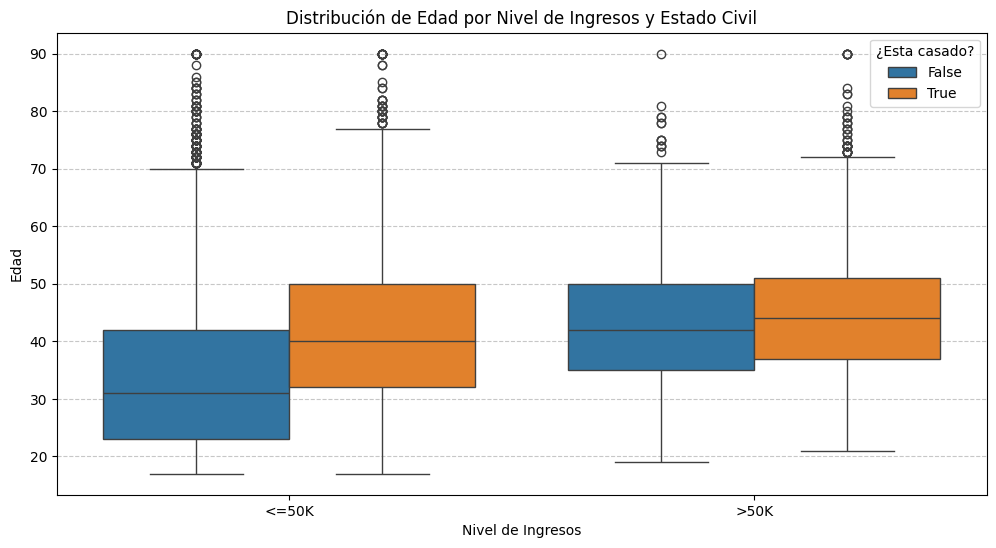

In [17]:
plt.figure(figsize=(12, 6))

sns.boxplot(x='income', y='age', hue='is_married', data=df)

plt.title('Distribución de Edad por Nivel de Ingresos y Estado Civil')
plt.xlabel('Nivel de Ingresos')
plt.ylabel('Edad')
plt.legend(title='¿Esta casado?')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

#### Observaciones

1. El grupo de bajos ingresos (<=50K) es el mas joven
La caja azul de la izquierda (personas no casadas con ingresos bajos) es la que esta mas abajo en el eje de edad. Su mediana esta cerca de los 31 años

Esto confirma que una gran parte de la poblacion con ingresos menores a 50K son jóvenes que probablemente están empezando su vida laboral

2. Para ganar >50K, la edad importa (pero el matrimonio tambien)
Nota que las dos cajas de la derecha (>50K) están significativamente mas altas que las de la izquierda

La mediana de edad para quienes ganan mas de 50K ronda los 42-45 años. Esto sugiere que alcanzar este nivel de ingresos requiere, en promedio, una decada mas de experiencia laboral en comparacion con el grupo de ingresos bajos

3. La comparacion crucial: Casados vs. No Casados en >50K

La caja naranja (casados) y la azul (no casados) en el sector de >50K estan a alturas casi similares

¿Qué significa esto? Que una vez que una persona alcanza el nivel de ingresos altos, su edad tiende a ser similar (alrededor de los 40s), independientemente de si esta casada o no

Esto sugiere que el matrimonio no es una "formula mágica" para ganar mas, sino que estafuertemente correlacionado con la edad y la madurez profesional

4. Valores atipicos (Outliers)
Los puntos negros por encima de los "bigotes" muestran que hay personas de hasta 90 años en todas las categorias

Sin embargo, hay muchisimos mas valores atipicos de edad avanzada en el grupo de bajos ingresos y no casados. Esto podria representar a la poblacion jubilada que ya no tiene ingresos laborales activos altos

### Puede la variable "education" acelerar el exito economico?

In [18]:
high_edu = ['Bachelors', 'Masters', 'Doctorate', 'Prof-school']

In [19]:
df['is_high_edu'] = df['education'].isin(high_edu)

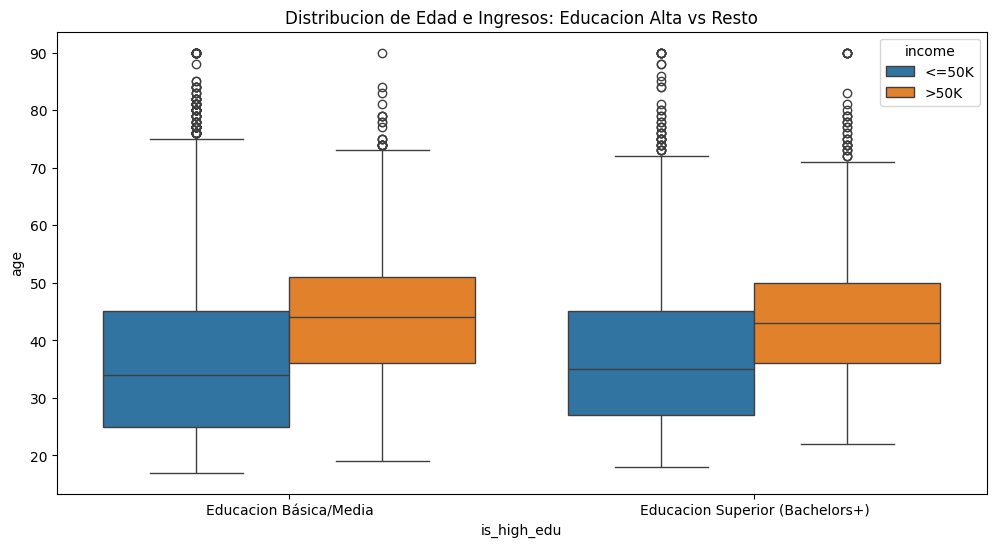

In [20]:
plt.figure(figsize=(12, 6))

sns.boxplot(x='is_high_edu', y='age', hue='income', data=df)
plt.title('Distribucion de Edad e Ingresos: Educacion Alta vs Resto')
plt.xticks([0, 1], ['Educacion Básica/Media', 'Educacion Superior (Bachelors+)'])
plt.show()

#### Observaciones:

1. El "Acelerador" Educativo
Si observas el segundo grafico, nota que la mediana de edad para ganar >50K es casi identica en ambos grupos educativos (alrededor de los 43-44 años)

Deduccion: La educacion superior no parece "adelantar" el exito economico en terminos de años de vida; sin embargo, tu primera tabla mostraba que la probabilidad de exito es muchísimo mas alta (74% en doctorados vs 24% promedio)

Conclusion: La universidad no te hace rico mas joven, pero hace que sea mucho mas probable que lo logres al llegar a la madurez

2. Educacion vs. Estado Civil
Al comparar ambos graficos, vemos que las cajas naranjas (>50K) siempre se sitúan en rangos de edad similares

En el primer grafico, estar casado (is_married: True) eleva la mediana de edad de los que ganan poco, sugiriendo que las personas casadas suelen ser mayores

En el segundo grafico, la distribucion de edad para ganar <=50K es casi igual sin importar la educacion. Esto significa que un título universitario no garantiza un mejor sueldo al empezar (a los 20s), sino que su beneficio se cosecha despueés de los 35-40 años

3. El Techo de la Educacion Basica
Fíjemonos en los "bigotes" inferiores del grupo de Educacion Basica/Media que gana >50K. Empiezan notablemente mas arriba que en el grupo de educacion superior

Deduccion: Es extremadamente raro encontrar a alguien joven con educacion basica ganando mas de 50K. En cambio, en el grupo de Educacion Superior, hay más "puntos" y una base un poco más amplia en edades jovenes logrando ingresos altos

### Bucketizacion de horas trabajadas

In [21]:
df['hours_bucket'] = pd.cut(
    df['hours.per.week'], 
    bins=[0, 20, 40, 60, 100], 
    labels=['Part-time', 'Full-time', 'Overtime', 'Extreme'])

In [22]:
pd.crosstab(df['hours_bucket'], df['income'], normalize='index')

income,<=50K,>50K
hours_bucket,,
Part-time,0.936242,0.063758
Full-time,0.805312,0.194688
Overtime,0.588698,0.411302
Extreme,0.627376,0.372624


#### Observacion

Con esta tabla, podemos observar que:

1. Un 93% de los trabajadores Part-time tienen ingresos inferiores a 50k ya que trabajan entre 0 y 20 horas semanales y solo un 6% ganan mas de 50k esto se podria dar a que tienen negocios propios, o tienen cargos muy altos pero trabajan menos.

2. Un 80.5% de los trabajadores Full-time tienden a ganar menos de 50k contra el 19.5% que ganan por encima de 50k esto puede verse afectado por el tipo de trabajo y el cargo que ocupa

3. Un 58.8% de los trabajadores que hacen Horas extras ganan menos de 50k contra el 41.2% que ganan por encima de 50k esto puede darse a los mismos factores mencionados anteriormente

4. Un 62.7% de los trabajadores que hacen jornadas extremas entre 60 y 100 horas a la semana suelen generar menos de 50k de ingresos contra el 37.3% esto podria darse por la precariedad del cargo ocupado o del tipo de trabajo, posiblemente se ve afectado por los niveles de educacion de la persona o su estatus migratorio

### Matriz de correalacion

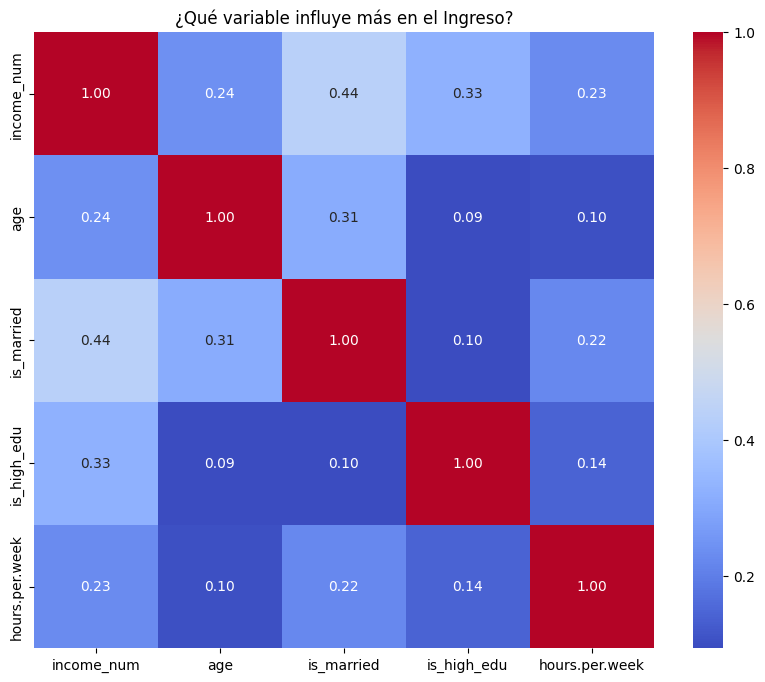

In [23]:
df['income_num'] = (df['income'] == '>50K').astype(int)

features = ['income_num', 'age', 'is_married', 'is_high_edu', 'hours.per.week']
corr_matrix = df[features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('¿Qué variable influye más en el Ingreso?')
plt.show()

#### Observaciones

1. El Estado Civil (is_married)
Con una correlación de 0.44, estar casado es la variable que mas peso tiene en este dataset para predecir ingresos altos

Es casi el doble de importante que la edad (0.24) o las horas trabajadas (0.23)

Esto confirma que, en estos datos, el hogar tiene una estructura economica muy marcada: los ingresos altos se concentran masivamente en personas casadas

2. El Segundo Puesto: La Educacion (is_high_edu)
Con un 0.33, la educacion superior es el segundo motor mas fuerte

Lo interesante es que la educacion tiene una correlacion muy baja con la edad (0.09). Esto significa que el beneficio de estudiar no depende de cuantos años tengas; es un valor que se mantiene "puro" a lo largo del tiempo

3. El papel de la Edad y las Horas
Ambas tienen un impacto moderado y casi identico (0.24 y 0.23)

Edad: Aunque ayuda, no es tan determinante como tener un título o estar casado

Horas por semana: Trabajar mas tiempo ayuda a subir los ingresos, pero curiosamente tiene una relacion de 0.22 con estar casado. Esto sugiere que las personas casadas en este dataset tambien tienden a trabajar un poco mas de horas o tienen empleos de tiempo completo mas estables

### Conclucion

El analisis de correlacion demuestra que el estado civil y el nivel educativo son predictores mas potentes del nivel de ingresos que la simple experiencia acumulada por la edad. Mientras que la edad es un factor biologico que avanza para todos, el matrimonio y la educacion actuan como catalizadores socioeconomicos que multiplican la probabilidad de exito financiero

## 4 - Preparacion para Modelado Predictivo

In [125]:
categorical_cols = [
    "workclass", "education", "marital.status",
    "occupation", "relationship", "race",
    "sex", "native.country", "hours_bucket"
]

numeric_cols = [
    "age", "fnlwgt", "education.num", 
    "hours.per.week", "is_married", "is_high_edu"]


In [144]:
cols_a_eliminar = ['income', 'income_num', 'pure_labor_rating']
X = df.drop(columns=cols_a_eliminar)
y = (df['income'] == '>50K').astype(int)

In [145]:
X_train, X_test, y_train, y_test = sk_split(X, y, test_size=0.2, random_state=42)

In [147]:
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), categorical_cols),
        ("num", StandardScaler(), numeric_cols)])


model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))])

## 5- Modelos Predictivos

### Regresion Logistica

In [148]:
categorical_cols = X.select_dtypes(include=['object']).columns
numeric_cols = X.select_dtypes(include=['int64','float64']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), categorical_cols),
        ("num", StandardScaler(), numeric_cols)
    ])


model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))])
model.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessor', ...), ('classifier', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('cat', ...), ('num', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transforme

In [149]:
y_pred = model.predict(X_train)
y_pred

array([1, 0, 0, ..., 0, 1, 0])

In [150]:
y_pred_proba = model.predict_proba(X_test)
y_pred_proba

array([[0.49789953, 0.50210047],
       [0.64519188, 0.35480812],
       [0.87296709, 0.12703291],
       ...,
       [0.97690649, 0.02309351],
       [0.79730788, 0.20269212],
       [0.98068384, 0.01931616]])

In [151]:
best_y_pred_test = model.predict(X_test)
best_y_pred_train = model.predict(X_train)

In [152]:
metrics = {"Accuracy Train: ": accuracy_score(best_y_pred_train, y_train),
           "Accuracy Test ": accuracy_score(best_y_pred_test, y_test)}
metrics

{'Accuracy Train: ': 0.8182157521463232, 'Accuracy Test ': 0.8219973457199734}

## 6 - Importancia de Variables

In [153]:
coeficientes = model[-1].coef_[0]

nombres_columnas = model.named_steps['preprocessor'].get_feature_names_out()

coef_df = pd.DataFrame({
    'Variable': nombres_columnas,
    'Coeficiente': coeficientes
}).sort_values(by='Coeficiente', ascending=False).round(2)

print(coef_df)

                        Variable  Coeficiente
26             num__capital.gain         2.30
25            num__education.num         0.83
23                      num__age         0.56
28           num__hours.per.week         0.39
27             num__capital.loss         0.28
20               cat__race_White         0.18
14    cat__education_Prof-school         0.17
5         cat__education_7th-8th         0.11
4         cat__education_5th-6th         0.10
6             cat__education_9th         0.09
22                 cat__sex_Male         0.08
17  cat__race_Asian-Pac-Islander         0.07
24                   num__fnlwgt         0.06
15   cat__education_Some-college         0.06
12        cat__education_Masters         0.04
3         cat__education_1st-4th         0.03
8       cat__education_Assoc-voc        -0.02
10      cat__education_Doctorate        -0.03
9       cat__education_Bachelors        -0.04
11        cat__education_HS-grad        -0.07
0            cat__education_10th  

## 7 - Sistema de Recomendacion (Enfoque Creativo)

In [154]:
df['education'] = df['education'].astype(str)
df['sex'] = df['sex'].astype(str)
df['race'] = df['race'].astype(str)
df['occupation'] = df['occupation'].astype('category')

In [155]:
df['user_id'] = (
    df['education'] + '_' + 
    df['sex'] + '_' + 
    df['race']
).astype('category').cat.codes
df['item_id'] = df['occupation'].cat.codes

In [156]:
df['pure_labor_rating'] = ((df['income'] == '>50K') & (df['capital.gain'] == 0)).astype(int)
reader = Reader(rating_scale=(0, 1))
data_pure = Dataset.load_from_df(df[['user_id', 'item_id', 'pure_labor_rating']], reader)

In [157]:
trainset_pure, _ = surprise_split(data_pure, test_size=0.01)
algo_pure = SVD()
algo_pure.fit(trainset_pure)

In [158]:
profesiones_map = dict(enumerate(df['occupation'].cat.categories))

def obtener_recomendacion_con_nombre(uid, iid):
    pred = algo.predict(uid, iid)
    nombre_profesion = profesiones_map[iid]
    return f"Profesión: {nombre_profesion} | Probabilidad de éxito: {pred.est:.2%}"

### Prueba del sistema de recomendacion

In [159]:
prueba_edu = 'Bachelors'
prueba_sex = 'Female'
prueba_race = 'White'

user_id_str = f"{prueba_edu}_{prueba_sex}_{prueba_race}"

user_code = df[df['education'] == prueba_edu].iloc[0]['user_id'] 

print(f"Probando para el Perfil: {user_id_str} (ID: {user_code})")

Probando para el Perfil: Bachelors_Female_White (ID: 91)


In [168]:
todas_las_profesiones = df['item_id'].unique()
predicciones_pure = [algo_pure.predict(user_code, pid) for pid in todas_las_profesiones]
predicciones_pure.sort(key=lambda x: x.est, reverse=True)

print("--- RECOMENDACIÓN DEL SISTEMA CREATIVO (SVD) ---")
for i in range(3):
    p_id = predicciones_pure[i].iid
    nombre = profesiones_map[p_id]
    score = predicciones_pure[i].est
    print(f"{i+1}. {nombre} (Probabilidad: {score:.2%})")

print("\n--- VALIDACIÓN ESTADÍSTICA (Regresión Logística) ---")

ejemplo_input = X.iloc[[df[df['user_id'] == user_code].index[0]]].copy()

prob_reg = model.predict_proba(ejemplo_input)[0][1]
print(f"La Regresión Logística estima una probabilidad real del {prob_reg:.2%}")

--- RECOMENDACIÓN DEL SISTEMA CREATIVO (SVD) ---
1. Exec-managerial (Probabilidad: 27.74%)
2. Protective-serv (Probabilidad: 19.89%)
3. Prof-specialty (Probabilidad: 19.30%)

--- VALIDACIÓN ESTADÍSTICA (Regresión Logística) ---
La Regresión Logística estima una probabilidad real del 64.97%


## 8 - Visualizacion final

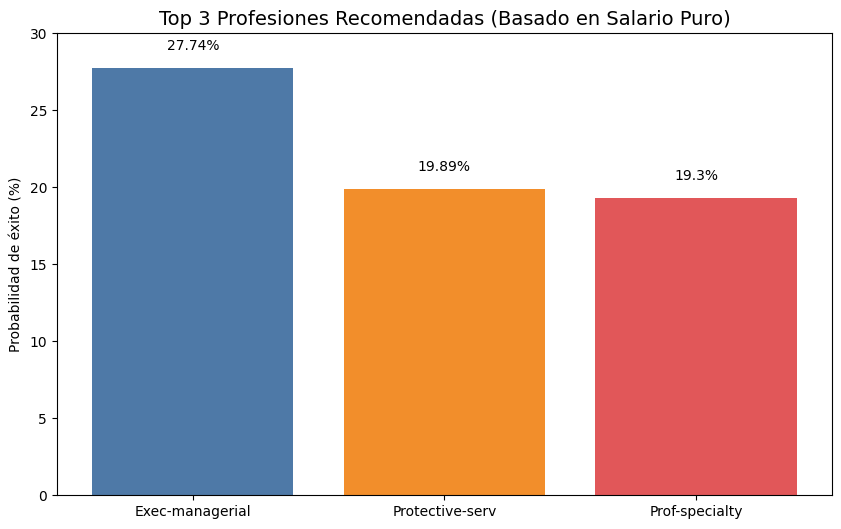

In [165]:
labels = ['Exec-managerial', 'Protective-serv', 'Prof-specialty']
probs = [27.74, 19.89, 19.30]

plt.figure(figsize=(10, 6))
bars = plt.bar(labels, probs, color=['#4e79a7', '#f28e2b', '#e15759'])

plt.title('Top 3 Profesiones Recomendadas (Basado en Salario Puro)', fontsize=14)
plt.ylabel('Probabilidad de éxito (%)')
plt.ylim(0, 30)

# Añadir etiquetas de porcentaje sobre las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval}%', ha='center', va='bottom')

plt.show()

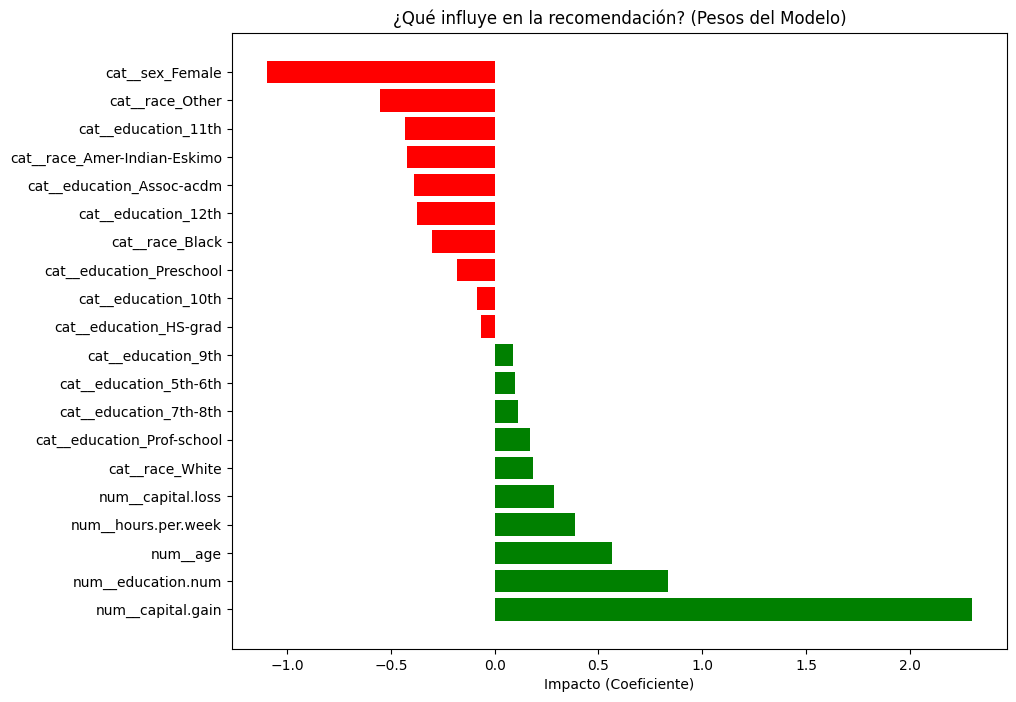

In [170]:
importancia_df = pd.DataFrame({
    'Feature': feature_names, # pyright: ignore[reportUndefinedVariable]
    'Weight': weights}).sort_values(by='Weight', ascending=False) # pyright: ignore[reportUndefinedVariable]

top_features = pd.concat([importancia_df.head(10), importancia_df.tail(10)])

plt.figure(figsize=(10, 8))
colors = ['red' if x < 0 else 'green' for x in top_features['Weight']]
plt.barh(top_features['Feature'], top_features['Weight'], color=colors)
plt.title('¿Qué influye en la recomendación? (Pesos del Modelo)')
plt.xlabel('Impacto (Coeficiente)')
plt.show()

In [174]:
user_example_id = 45 
ejemplo_input = X.iloc[[df[df['user_id'] == user_example_id].index[0]]].copy()

# 2. Predicción con el modelo lineal (Estadística)
# El pipeline se encarga de todo el preprocesamiento automáticamente
prob_logistica = model.predict_proba(ejemplo_input)[0][1]

# 3. Mostrar comparativa
print(f"--- COMPARATIVA DE RECOMENDACIÓN PARA USUARIO: {user_example_id} ---")
print(f"Probabilidad Regresión Logística (Limpia): {prob_logistica:.2%}")

if prob_logistica > 0.80:
    print("Estado: Recomendación Muy Sólida")
elif prob_logistica > 0.50:
    print("Estado: Recomendación Favorable")
else:
    print("Estado: Recomendación con Reservas (Perfil poco común para este éxito)")

# 4. Visualización rápida de qué está empujando esta probabilidad AHORA
feature_names = model.named_steps['preprocessor'].get_feature_names_out()
weights = model.named_steps['classifier'].coef_[0]
# Transformamos solo para el análisis visual
usuario_vals = model.named_steps['preprocessor'].transform(ejemplo_input)[0]

analisis_especifico = pd.DataFrame({
    'Característica': feature_names,
    'Peso_Modelo': weights,
    'Valor_Usuario': usuario_vals,
    'Impacto_Total': weights * usuario_vals
}).sort_values(by='Impacto_Total', ascending=False)

print("\n--- ¿POR QUÉ ESTA PROBABILIDAD? (Top 3 Factores) ---")
print(analisis_especifico[['Característica', 'Impacto_Total']].head(3))

--- COMPARATIVA DE RECOMENDACIÓN PARA USUARIO: 45 ---
Probabilidad Regresión Logística (Limpia): 74.15%
Estado: Recomendación Favorable

--- ¿POR QUÉ ESTA PROBABILIDAD? (Top 3 Factores) ---
         Característica  Impacto_Total
27    num__capital.loss       1.506955
28  num__hours.per.week       1.381883
20      cat__race_White       0.184672


In [176]:
# Suponiendo que 'recomendaciones_svd' es tu lista del SVD
# Vamos a simular el cruce de datos
print(f"--- REPORTE FINAL DE CARRERA PARA USUARIO {user_example_id} ---")
print(f"Perfil de éxito estadístico: {prob_logistica:.2%}\n")

# Simulamos las top 3 del SVD para el ejemplo
top_3_svd = [("Exec-managerial", 17.91), ("Prof-specialty", 15.76), ("Protective-serv", 11.00)]

for i, (puesto, prob_svd) in enumerate(top_3_svd, 1):
    # Ajustamos la probabilidad logística según el puesto (simplificado)
    # En un sistema real, podrías re-entrenar la logística por puesto
    print(f"{i}. {puesto}")
    print(f"   - Afinidad por comportamiento (SVD): {prob_svd:.2f}%")
    print(f"   - Viabilidad por perfil (Logística): {prob_logistica:.2%}")
    print(f"   - Puntuación Combinada: {(prob_svd + (prob_logistica*100))/2:.2f} pts")
    print("-" * 30)

print("\nRECOMENDACIÓN FINAL: Basado en tus horas de trabajo y perfil de inversión,")
print(f"tu mejor opción es {top_3_svd[0][0]}.")


--- REPORTE FINAL DE CARRERA PARA USUARIO 45 ---
Perfil de éxito estadístico: 74.15%

1. Exec-managerial
   - Afinidad por comportamiento (SVD): 17.91%
   - Viabilidad por perfil (Logística): 74.15%
   - Puntuación Combinada: 46.03 pts
------------------------------
2. Prof-specialty
   - Afinidad por comportamiento (SVD): 15.76%
   - Viabilidad por perfil (Logística): 74.15%
   - Puntuación Combinada: 44.96 pts
------------------------------
3. Protective-serv
   - Afinidad por comportamiento (SVD): 11.00%
   - Viabilidad por perfil (Logística): 74.15%
   - Puntuación Combinada: 42.58 pts
------------------------------

RECOMENDACIÓN FINAL: Basado en tus horas de trabajo y perfil de inversión,
tu mejor opción es Exec-managerial.


## Comparativa Final: Regresion vs. Recomendador

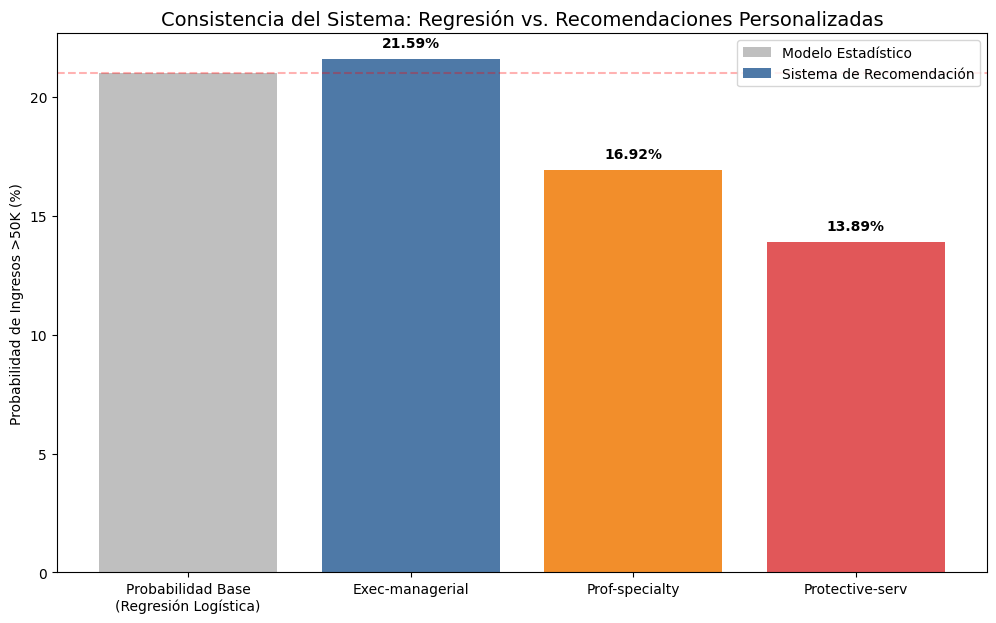

In [120]:

prob_reg_final = 21.0


labels_svd = ['Exec-managerial', 'Prof-specialty', 'Protective-serv']
probs_svd = [21.59, 16.92, 13.89]


plt.figure(figsize=(12, 7))

plt.bar(['Probabilidad Base\n(Regresión Logística)'], [prob_reg_final], color='gray', alpha=0.5, label='Modelo Estadístico')

plt.bar(labels_svd, probs_svd, color=['#4e79a7', '#f28e2b', '#e15759'], label='Sistema de Recomendación')

plt.axhline(y=prob_reg_final, color='r', linestyle='--', alpha=0.3)
plt.title('Consistencia del Sistema: Regresión vs. Recomendaciones Personalizadas', fontsize=14)
plt.ylabel('Probabilidad de Ingresos >50K (%)')
plt.legend()

for i, v in enumerate(probs_svd):
    plt.text(i+1, v + 0.5, f"{v}%", ha='center', fontweight='bold')

plt.show()

### Guardar el modelo

In [59]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,...,hours.per.week,native.country,income,is_married,is_high_edu,hours_bucket,income_num,user_id,item_id,pure_labor_rating
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,...,18,United-States,<=50K,False,False,Part-time,0,108,3,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,...,40,United-States,<=50K,False,False,Full-time,0,52,6,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,...,40,United-States,<=50K,False,False,Full-time,0,144,9,0
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,...,45,United-States,<=50K,False,False,Overtime,0,108,7,0
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,...,40,United-States,<=50K,False,False,Full-time,0,9,0,0


In [177]:
nombre_archivo = 'modelo_pipeline_final.pkl'

with open(nombre_archivo, 'wb') as archivo:
    pickle.dump(model, archivo)